# Problema 1

Considere un juego de disparejo entre cuatro jugadores, en el que cada jugador adopta la siguiente estrategia:

- El jugador 1 siempre escoge al azar entre las dos opciones.
- El jugador 2 escoge siempre hacia abajo sin importar lo que haya ocurrido anteriormente.
- El jugador 3 escoge la última opción ganadora de las partidas anteriores. En la primera jugada, escoge arriba.
- El jugador 4 escoge aquello opuesto al jugador 1 en la última partida. En la primera jugada, escoge al azar.

Utilice AgentPy para generar una simulación del juego, y simule 1000 juegos consecutivos. Muestre los resultados obtenidos para cada uno de los jugadores al final de la simulación.

¿Qué jugador obtuvo mejores resultados? ¿Alguna de las estrategias fue mejor que las otras?

In [845]:
# Model design
import agentpy as ap
import networkx as nx 
import numpy as np 
import random 


# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython
from random import randint

In [846]:
class Player(ap.Agent):

    """ Agente Jugador de disparejo """

    def setup(self):

        self.strategy = 0       # None = 0, Strategy1 = 1, Strategy2 = 2, Strategy3 = 3, Strategy4 = 4
        self.choice = 0         # Down = 0, Up = 1
        self.lastWinner = 2     # FirstRound = 2
        self.lastFirstPlayerChoice = 0
        
    def Strategy1(self):

        self.choice = randint(0, 1)

    def Strategy2(self):

        self.choice = 0
    
    def Strategy3(self):

        if self.lastWinner == 2:
            self.choice = 1
        else:
            self.choice = self.lastWinner
    
    def Strategy4(self):

        if self.lastWinner == 2:
            self.choice = randint(0, 1)
        else:
            if self.lastFirstPlayerChoice == 0:
                self.choice = 1
            else:
                self.choice = 0


In [847]:
class DisparejoModel(ap.Model):
    
    def setup(self):
        """ Initialize the agents of the model. """
        # Create agents
        self.agents = ap.AgentList(self, self.p.agents, Player)
        arr = [1, 2, 3, 4]
        for i in range(4):
            self.agents[i].strategy = arr[i]

    def step(self):
        empate = 0
        gana1 = 0
        gana0 = 0
        for i in range(4):
            if self.agents[i].strategy == 1:
                self.agents[i].Strategy1()

            if self.agents[i].strategy == 2:
                self.agents[i].Strategy2()

            if self.agents[i].strategy == 3:
                self.agents[i].Strategy3()
                
            if self.agents[i].strategy == 4:
                self.agents[i].Strategy4()
                
        self.agents.lastWinner = 1

        UP_Agents = len(self.agents.select(self.agents.choice == 1))
        DOWN_Agents = len(self.agents.select(self.agents.choice == 0))
        
        if UP_Agents == 1: 
            gana1 = 1
            self.agents.lastWinner = 1    
        else:
            if DOWN_Agents == 1: 
                gana0 = 1
                self.agents.lastWinner = 0  
            else: 
                if UP_Agents == DOWN_Agents or UP_Agents== 4 or DOWN_Agents== 4:
                    empate=1
                    self.agents.lastWinner = 2

        if empate == 1:
            print("Empate ")
            self.record('Partida', str(self.agents.choice))
            self.record('Winner ', 5)
            self.p.empates= self.p.empates+1
        else:
            if gana0 == 1:
                for r in range(4):
                    if str(self.agents.select(self.agents.strategy == r+1).choice) == "[0]":
                        print(r+1)
                        self.record('Partida', str(self.agents.choice))
                        self.record('Winner ', r+1)
                        if r+1 == 1:
                            self.p.wins1= self.p.wins1+1
                        if r+1== 2:
                            self.p.wins2= self.p.wins2+1
                        if r+1 == 3:
                            self.p.wins3= self.p.wins3+1
                        if r+1 == 4:
                            self.p.wins4= self.p.wins4+1
                        
            if gana1== 1:
                for l in range(4):
                    if str(self.agents.select(self.agents.strategy == l+1).choice) == "[1]":
                        print(l+1)
                        self.record('Partida', str(self.agents.choice))
                        self.record('Winner ', l+1)
                        if l+1 == 1:
                            self.p.wins1= self.p.wins1+1
                        if l+1== 2:
                            self.p.wins2= self.p.wins2+1
                        if l+1 == 3:
                            self.p.wins3= self.p.wins3+1
                        if l+1 == 4:
                            self.p.wins4= self.p.wins4+1

        if self.p.empates+self.p.wins1+self.p.wins2+self.p.wins3+self.p.wins4 == self.p.steps:
            print("Victorias jugador 1: " + str(self.p.wins1))
            print("Victorias jugador 2: " + str(self.p.wins2))
            print("Victorias jugador 3: " + str(self.p.wins3))
            print("Victorias jugador 4: " + str(self.p.wins4))
            print("Empates : " + str(self.p.empates))

            if self.p.wins1 > self.p.wins2 and self.p.wins1 > self.p.wins3 and self.p.wins1 > self.p.wins4 :
                print("Ganó jugador 1: " + str(self.p.wins1) + " veces")
                self.report('Jugador ganador: ', 1)
            else :
                if self.p.wins2 > self.p.wins1 and self.p.wins2 > self.p.wins3 and self.p.wins2 > self.p.wins4 :
                    print("Ganó jugador 2: " + str(self.p.wins2) + " veces")
                    self.report('Jugador ganador: ', 2)
                else:
                    if self.p.wins3 > self.p.wins1 and self.p.wins3 > self.p.wins2 and self.p.wins3 > self.p.wins4 :
                        print("Ganó jugador 3: " + str(self.p.wins3) + " veces")
                        self.report('Jugador ganador: ', 3)
                    else: 
                        if self.p.wins4 > self.p.wins1 and self.p.wins4 > self.p.wins2 and self.p.wins4 > self.p.wins3 :
                            print("Ganó jugador 4: " + str(self.p.wins4) + " veces")
                            self.report('Jugador ganador: ', 4)
                        else:
                            print("No hay ganador")
                            self.report('Jugador ganador: ', 0)   
        
        var1 = self.agents.select(self.agents.strategy == 1).choice
        self.agents.select(self.agents.strategy == 1).lastFirstPlayerChoice = var1
        self.agents.select(self.agents.strategy == 2).lastFirstPlayerChoice = var1
        self.agents.select(self.agents.strategy == 3).lastFirstPlayerChoice = var1
        self.agents.select(self.agents.strategy == 4).lastFirstPlayerChoice = var1

    

In [848]:
parameters = {
    'agents': 4,
    'steps': 1000,
    'wins1': 0,
    'wins2': 0,
    'wins3': 0,
    'wins4': 0,
    'empates': 0,
}

model = DisparejoModel(parameters)
results = model.run()

Empate 
Completed: 1 stepsEmpate 
Completed: 2 steps3
Completed: 3 steps2
Completed: 4 stepsEmpate 
Completed: 5 stepsEmpate 
Completed: 6 steps2
Completed: 7 stepsEmpate 
Completed: 8 steps2
Completed: 9 steps1
Completed: 10 steps3
Completed: 11 steps2
Completed: 12 steps1
Completed: 13 steps3
Completed: 14 steps2
Completed: 15 stepsEmpate 
Completed: 16 steps2
Completed: 17 stepsEmpate 
Completed: 18 stepsEmpate 
Completed: 19 steps2
Completed: 20 stepsEmpate 
Completed: 21 stepsEmpate 
Completed: 22 stepsEmpate 
Completed: 23 stepsEmpate 
Completed: 24 steps2
Completed: 25 steps1
Completed: 26 steps3
Completed: 27 steps2
Completed: 28 stepsEmpate 
Completed: 29 stepsEmpate 
Completed: 30 stepsEmpate 
Completed: 31 steps2
Completed: 32 stepsEmpate 
Completed: 33 stepsEmpate 
Completed: 34 steps3
Completed: 35 steps2
Completed: 36 stepsEmpate 
Completed: 37 stepsEmpate 
Completed: 38 steps2
Completed: 39 stepsEmpate 
Completed: 40 steps3
Completed: 41 steps2
Completed: 42 steps1
Compl

In [849]:

results.values()
results.info

{'model_type': 'DisparejoModel',
 'time_stamp': '2022-11-14 13:10:37',
 'agentpy_version': '0.1.5',
 'python_version': '3.11.',
 'experiment': False,
 'completed': True,
 'created_objects': 4,
 'completed_steps': 1000,
 'run_time': '0:00:00.107713'}

In [850]:

results.variables.DisparejoModel.head()

,Partida,Winner
t,,
1,"[1, 0, 1, 0]",5
2,"[0, 0, 1, 1]",5
3,"[0, 0, 1, 0]",3
4,"[1, 0, 1, 1]",2
5,"[0, 0, 0, 0]",5


En la siguiente gráfica, se puede visualizar el número de victorias en los 1000 juegos. Los números del 1 al 4 representan a cada jugador, y el número representa los empates que sucedieron.

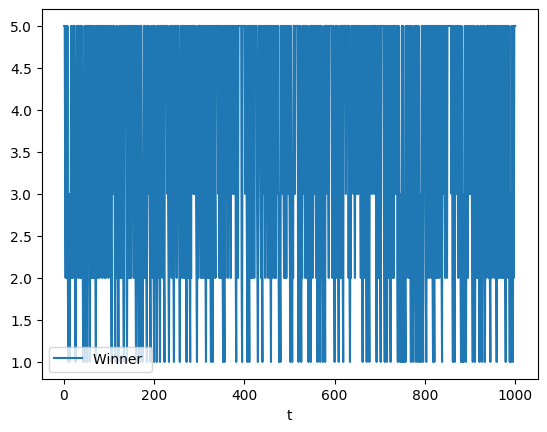

In [851]:

data = results.variables.DisparejoModel
ax = data.plot()